#  Adult/ Wine  데이터 셋 사용 분류 정확도 95%이상 나오는 모델을 찾으세요

- 테스트 셋이 따로 분리안되었으면 25%를 테스트셋으로 사용
- Adult : 2진 분류 - 연소득 5천만 이상/이하
- Wine : 원산지 1,2,3 분류


1. 분류
2. 값 예측 (회귀)
3. 비지도학습 - 군집화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
import os
os.environ['PATH'] += os.pathsep  + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [20]:
train = pd.read_csv('wine.data', header=None, )
train.shape

(178, 14)

In [21]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [22]:
train.columns=['Location', 'Alcohol','Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols' ,'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue','OD280/OD315 of diluted wines','Proline']
train.head()

,Location,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [23]:
train.dtypes

Location                          int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [24]:
train["Location"].value_counts()

2    71
1    59
3    48
Name: Location, dtype: int64

In [32]:
X = train.drop(columns = 'Location')
y = train['Location']

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
X,y, random_state=0)

In [60]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
dt.score(X_train, y_train), dt.score(X_test, y_test)

(1.0, 0.9111111111111111)

<BarContainer object of 13 artists>

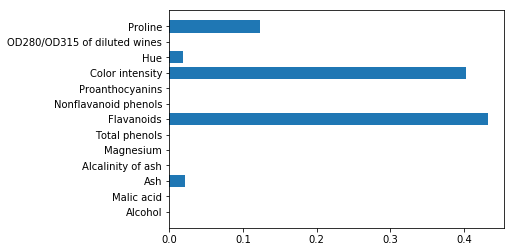

In [64]:
plt.barh(X.columns, dt.feature_importances_)

In [61]:
rt = RandomForestClassifier(n_estimators=100).fit(X_test, y_test)
rt.score(X_train, y_train), rt.score(X_test, y_test)

(0.9774436090225563, 1.0)

<BarContainer object of 13 artists>

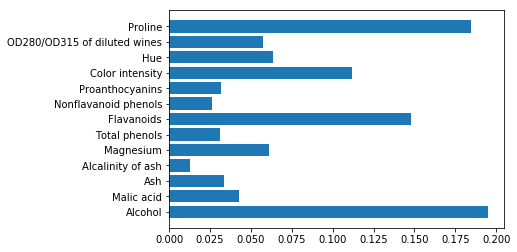

In [65]:
plt.barh(X.columns, rt.feature_importances_)

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
gbc = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
gbc.score(X_train, y_train), gbc.score(X_test, y_test) 

(1.0, 0.9555555555555556)